<a href="https://colab.research.google.com/github/sherali02/Customer_segmentation/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Data Collection**

In [9]:
# Reading Mall_Customers.csv file
data_set=pd.read_csv('Mall_Customers.csv')
print(data_set)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


**Data Analysis**

In [10]:
print('Information about dataset:')
data_set.info()

print('\n\nDescribtion of each column in dataset:')
data_set.describe()

Information about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Describtion of each column in dataset:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Data Cleaning**

In [11]:
# Removing rows with null values if any
data_set.dropna(inplace=True)
print(data_set.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Data Visualization**

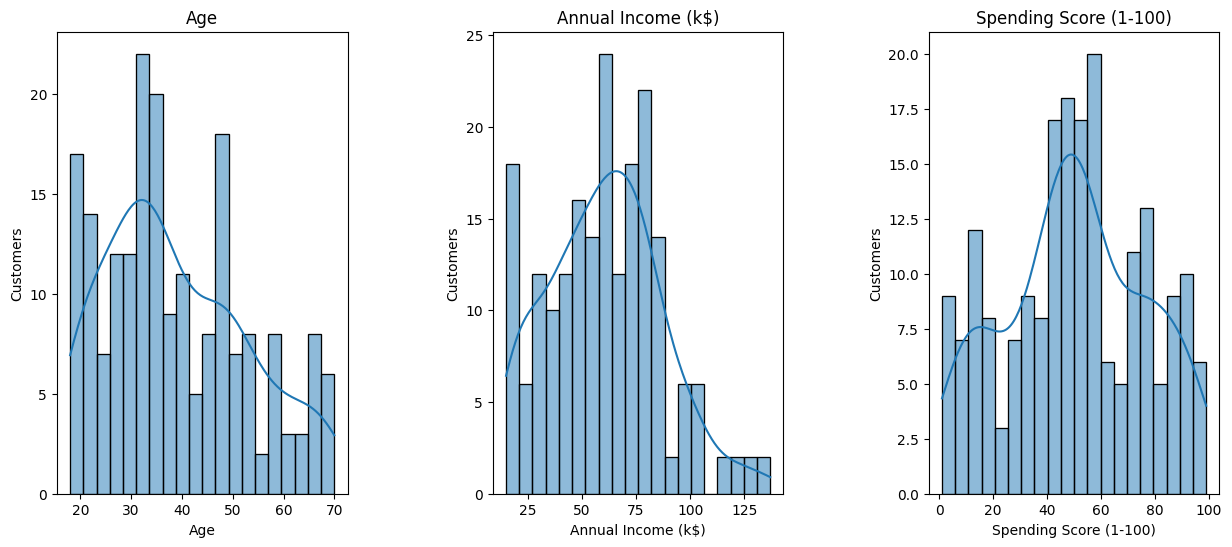

In [12]:
# Visualization of number of Customers respective to Age, Annual Income and Spending Score

plt.figure(1,figsize=(15,6))
n=0
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.histplot(data_set[i],bins=20,kde=True)
  plt.title(i)
  plt.ylabel('Customers')
plt.show()

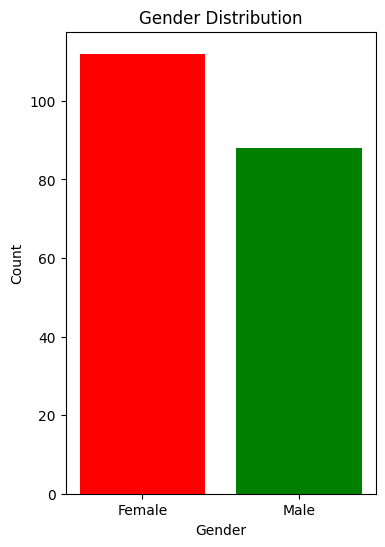

In [13]:
# Bar graph of Gender Distribution
plt.figure(1,figsize=(4,6))
gender_counts = data_set['Gender'].value_counts()
colors = ['r', 'g']
plt.bar(gender_counts.index, gender_counts.values,color=colors)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Before Clustering

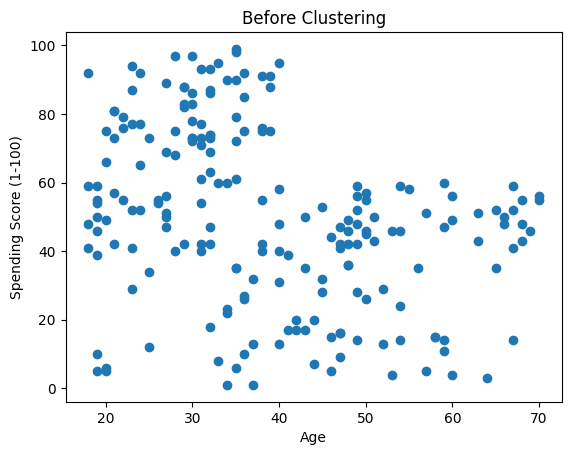

In [14]:
# 1.Scatter plot between Age and spending score
plt.scatter(data_set['Age'], data_set['Spending Score (1-100)'])
plt.title('Before Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

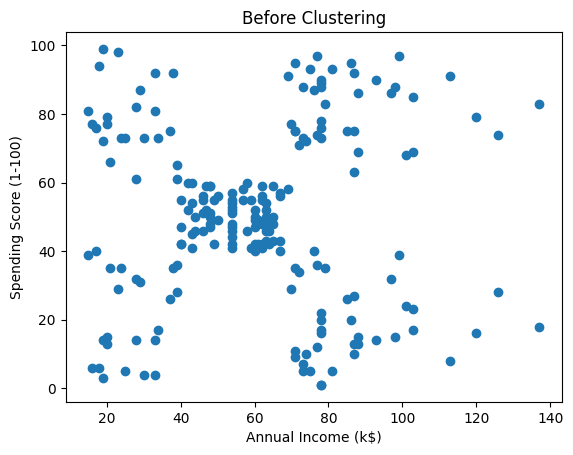

In [15]:
# 2.Scatter plot between Annual income and spending score
plt.scatter(data_set['Annual Income (k$)'], data_set['Spending Score (1-100)'])
plt.title('Before Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

**1. Clustering the model on basis of Age and Spending score**

In [16]:
# Choosing age & spending score
x1=data_set.iloc[:,[2,4]].values


Choosing number of clusters by WCSS (Within Cluster Sum of Squares)

In [17]:
wcss1=[]
# finding wcss values for 1-10 clusters
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',n_init=80)
  kmeans.fit(x1)
  wcss1.append(kmeans.inertia_)

Elbow graph 1

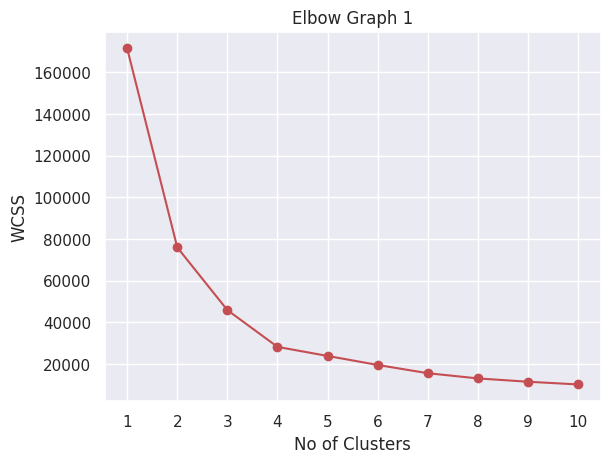

In [18]:
#plotting elbow graph for wcss and clusters
sns.set()
plt.title('Elbow Graph 1')
plt.plot(range(1,11),wcss1,color='r',marker='o')
plt.xticks(np.arange(1,11,1))
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

Traning the k-Means Clustering model

In [19]:
# from the Elbow graph Optimum no of clusters k=4
kmeans=KMeans(n_clusters=4,init='k-means++',n_init=10)

# labelling the clusters for each data point
y1=kmeans.fit_predict(x1)
print('Cluster Numbers:\n',y1)

# Centroids of clusters
print('Centroids of Clusters:\n',kmeans.cluster_centers_)

Cluster Numbers:
 [2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
Centroids of Clusters:
 [[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]]


Visualizing all Clusters

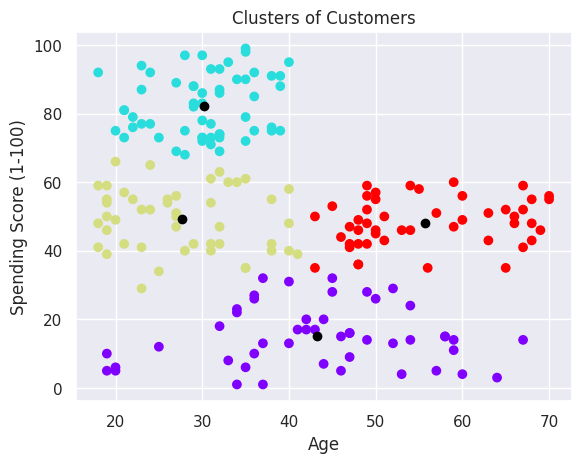

In [20]:
#plotting clusters with their centriods
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')

# Black dots represents Centroids of respective clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

**2. Clustering the model on basis of Annual income and Spending score**

In [21]:
# Choosing annual income & spending score
x2=data_set.iloc[:,[3,4]].values

Choosing number of clusters by WCSS (Within Cluster Sum of Squares)

In [22]:
wcss2=[]
# finding wcss values for 1-10 clusters
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',n_init=80)
  kmeans.fit(x2)
  wcss2.append(kmeans.inertia_)


Elbow graph 2

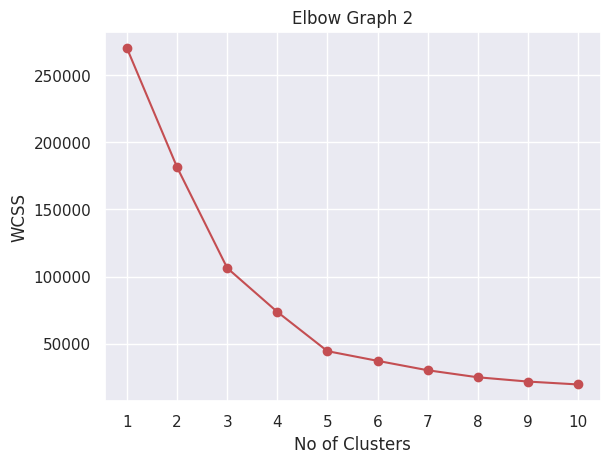

In [23]:
#plotting elbow graph for wcss and clusters
sns.set()
plt.title('Elbow Graph 2')
plt.plot(range(1,11),wcss2,color='r',marker='o')
plt.xticks(np.arange(1,11,1))
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

Traning the k-Means Clustering model

In [24]:
# from the Elbow graph Optimum no of clusters k=5
kmeans=KMeans(n_clusters=5,init='k-means++',n_init=10)

# labelling the clusters for each data point
y2=kmeans.fit_predict(x2)
print('Cluster Numbers:\n',y2)

# Centroids of clusters
print('Centroids of Clusters:\n',kmeans.cluster_centers_)


Cluster Numbers:
 [3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Centroids of Clusters:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


Visualizing all Clusters

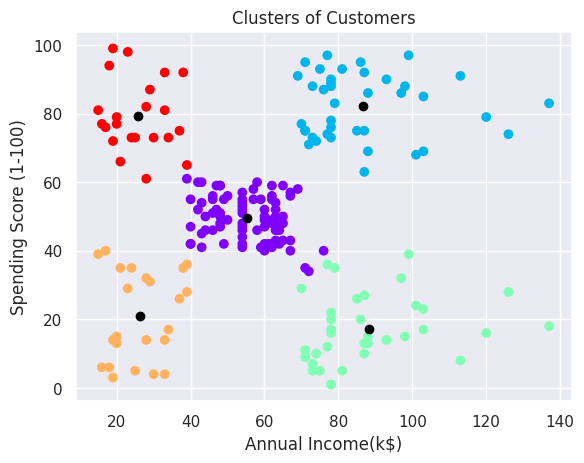

In [25]:
#plotting clusters with their centriods
plt.scatter(x2[:,0],x2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()